___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Session - 9<br><br>RNN Syntax Basics<br><br>Sine Wave<br><h1>

# RNN Syntax Basics

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

## Creating Data

In [2]:
x = np.linspace(0,50,501)
y = np.sin(x)

In [3]:
x

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
        8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
        9.9, 10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9,
       11. , 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12. ,
       12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13. , 13.1,
       13.2, 13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14. , 14.1, 14.2,
       14.3, 14.4, 14.5, 14.6, 14.7, 14.8, 14.9, 15

In [4]:
y

array([ 0.00000000e+00,  9.98334166e-02,  1.98669331e-01,  2.95520207e-01,
        3.89418342e-01,  4.79425539e-01,  5.64642473e-01,  6.44217687e-01,
        7.17356091e-01,  7.83326910e-01,  8.41470985e-01,  8.91207360e-01,
        9.32039086e-01,  9.63558185e-01,  9.85449730e-01,  9.97494987e-01,
        9.99573603e-01,  9.91664810e-01,  9.73847631e-01,  9.46300088e-01,
        9.09297427e-01,  8.63209367e-01,  8.08496404e-01,  7.45705212e-01,
        6.75463181e-01,  5.98472144e-01,  5.15501372e-01,  4.27379880e-01,
        3.34988150e-01,  2.39249329e-01,  1.41120008e-01,  4.15806624e-02,
       -5.83741434e-02, -1.57745694e-01, -2.55541102e-01, -3.50783228e-01,
       -4.42520443e-01, -5.29836141e-01, -6.11857891e-01, -6.87766159e-01,
       -7.56802495e-01, -8.18277111e-01, -8.71575772e-01, -9.16165937e-01,
       -9.51602074e-01, -9.77530118e-01, -9.93691004e-01, -9.99923258e-01,
       -9.96164609e-01, -9.82452613e-01, -9.58924275e-01, -9.25814682e-01,
       -8.83454656e-01, -

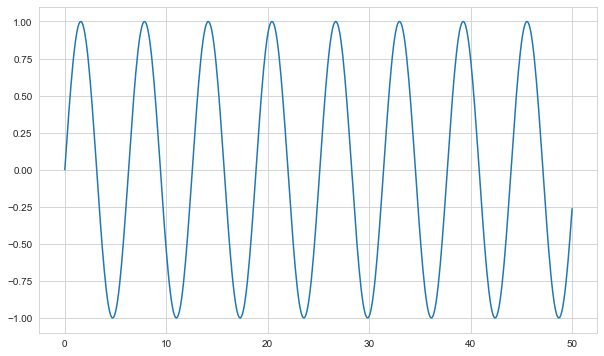

In [5]:
plt.plot(x,y)

Let's turn this into a DataFrame

In [6]:
df = pd.DataFrame(data=y,index=x,columns=['Sine'])

In [7]:
df

,Sine
0.000,0.000
0.100,0.100
0.200,0.199
0.300,0.296
0.400,0.389
...,...
49.600,-0.617
49.700,-0.536
49.800,-0.449
49.900,-0.357


## Preprocessing of Data

### Train Test Split

In [ ]:
# burada sıra önemli olduğundan datayı karışık olarak değil, sırasına göre train ve test olarak böleceğiz

In [8]:
len(df)

501

In [9]:
test_percent = 0.15

In [10]:
len(df)*test_percent

75.14999999999999

In [11]:
test_point = np.round(len(df)*test_percent)
test_point

75.0

In [12]:
test_ind = int(len(df) - test_point)
test_ind

426

In [13]:
train = df.iloc[:test_ind]
test = df.iloc[test_ind:]

In [14]:
train

,Sine
0.000,0.000
0.100,0.100
0.200,0.199
0.300,0.296
0.400,0.389
...,...
42.100,-0.952
42.200,-0.978
42.300,-0.994
42.400,-1.000


In [15]:
test

,Sine
42.600,-0.982
42.700,-0.959
42.800,-0.925
42.900,-0.883
43.000,-0.832
...,...
49.600,-0.617
49.700,-0.536
49.800,-0.449
49.900,-0.357


In [ ]:
# bu modelde tahmin işlemi sıraya göre yapılacağından ayrı bir target label (y) kullanmayacağız

### Scaling

In [16]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
scaler = MinMaxScaler()

In [18]:
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

## Time Series Generator

In [19]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [ ]:
#help(TimeseriesGenerator)

In [20]:
# define generator
length = 3 # Length of the output sequences (in number of timesteps)
           # 3 satır kullanarak dördüncü satırı tahmin ettireceğiz (satırlar sırayla ilerleyecek)
batch_size = 2 # Number of timeseries samples in each batch
stride = 2 # Period between successive output sequences (ne kadar kaydırarak gideceğimiz)
generator = TimeseriesGenerator(data = train_scaled,
                                targets = train_scaled,
                                length = length,
                                batch_size = batch_size,
                                stride = stride)

In [21]:
len(train_scaled)

426

In [22]:
len(generator) # = (len(train)-length)/(batch_size*stride) 

106

In [23]:
generator

In [24]:
generator[0]

(array([[[0.49999912],
         [0.54991622],
         [0.59933458]],
 
        [[0.59933458],
         [0.64776041],
         [0.69470985]]]),
 array([[0.64776041],
        [0.73971381]]))

In [25]:
# What does the first batch look like?
X, y = generator[0]

In [26]:
print(f'Given the Array: \n{X}')
print(f'Predict this y: \n{y}')

Given the Array: 
[[[0.49999912]
  [0.54991622]
  [0.59933458]]

 [[0.59933458]
  [0.64776041]
  [0.69470985]]]
Predict this y: 
[[0.64776041]
 [0.73971381]]


In [27]:
train_scaled[:10]

array([[0.49999912],
       [0.54991622],
       [0.59933458],
       [0.64776041],
       [0.69470985],
       [0.73971381],
       [0.78232262],
       [0.82211054],
       [0.85868004],
       [0.89166571]])

<AxesSubplot:>

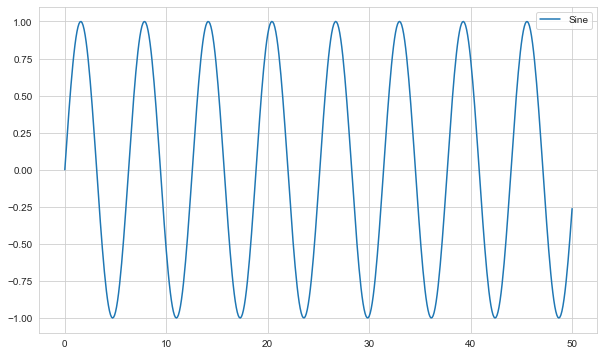

In [28]:
df.plot()

In [ ]:
# toplam 501 nokta vardı, bir periyot yaklaşık 64 noktada tamamlanıyor;
# bu sebeple length=64 seçeceğiz

The more length the more training time

In [29]:
length = 64 # Length of the output sequences (in number of timesteps)
batch_size = 1 # Number of timeseries samples in each batch
generator = TimeseriesGenerator(data = train_scaled, targets = train_scaled, length = length, batch_size = batch_size)

In [30]:
# What does the first batch look like?
X, y = generator[0]

In [31]:
len(generator)

362

In [32]:
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n{y}')

Given the Array: 
[4.99999116e-01 5.49916225e-01 5.99334579e-01 6.47760405e-01
 6.94709850e-01 7.39713809e-01 7.82322618e-01 8.22110545e-01
 8.58680040e-01 8.91665714e-01 9.20737985e-01 9.45606372e-01
 9.66022399e-01 9.81782075e-01 9.92727935e-01 9.98750612e-01
 9.99789928e-01 9.95835500e-01 9.86926839e-01 9.73152957e-01
 9.54651478e-01 9.31607263e-01 9.04250562e-01 8.72854714e-01
 8.37733417e-01 7.99237589e-01 7.57751870e-01 7.13690771e-01
 6.67494535e-01 6.19624741e-01 5.70559686e-01 5.20789614e-01
 4.70811810e-01 4.21125636e-01 3.72227539e-01 3.24606094e-01
 2.78737119e-01 2.35078919e-01 1.94067715e-01 1.56113277e-01
 1.21594831e-01 9.08572769e-02 6.42077324e-02 4.19124713e-02
 2.41942605e-02 1.12301346e-02 3.14962674e-03 3.34747619e-05
 1.91281421e-03 8.76886734e-03 2.05331307e-02 3.70880598e-02
 5.82682430e-02 8.38620552e-02 1.13613771e-01 1.47226122e-01
 1.84363264e-01 2.24654135e-01 2.67696162e-01 3.13059283e-01
 3.60290246e-01 4.08917133e-01 4.58454081e-01 5.08406134e-01]
Predi

## Modeling

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM

In [34]:
# We're only using one feature in our time series
n_features = 1

In [35]:
# seed = 42

In [36]:
# define model
model = Sequential()

# Simple RNN layer
model.add(SimpleRNN(units = 100, activation = "tanh", input_shape=(length, n_features)))

# Final Prediction
model.add(Dense(units = 1))

model.compile(optimizer='adam', loss='mse')

In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 100)               10200     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 10,301
Trainable params: 10,301
Non-trainable params: 0
_________________________________________________________________


In [38]:
# params = 1 * ((size_of_input + 1) * size_of_output + size_of_output^2)
1 * ((1+1)*100+(100**2))

10200

In [39]:
model.fit_generator(generator = generator, epochs = 5)

Epoch 1/5
362/362 [==============================] - 6s 13ms/step - loss: 0.0183
Epoch 2/5
362/362 [==============================] - 5s 13ms/step - loss: 2.3413e-04
Epoch 3/5
362/362 [==============================] - 5s 13ms/step - loss: 6.1195e-04
Epoch 4/5
362/362 [==============================] - 5s 13ms/step - loss: 8.3331e-05
Epoch 5/5
362/362 [==============================] - 5s 12ms/step - loss: 9.5622e-06


<AxesSubplot:>

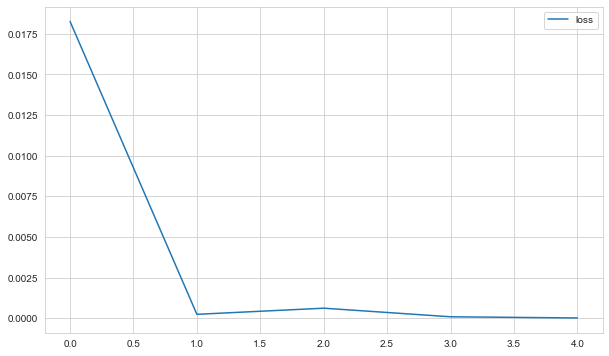

In [40]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()
# hehangi bir validation data'sı olmadığından bu grafikte overfit-underfit durumlarını tespit edemiyoruz

## Evaluate on Test Data

In [41]:
first_eval_batch = train_scaled[-length:]

In [42]:
first_eval_batch.shape

(64, 1)

In [43]:
generator[0][0].shape  # model inputları üç boyutlu eğittiğinden tahminleri de aynı boyuta getirmemiz gerekir

(1, 64, 1)

In [44]:
first_eval_batch = first_eval_batch.reshape((1, length, n_features))
# first_eval_batch = np.expand_dims(first_eval_batch, axis=0)

In [45]:
first_eval_batch.shape

(1, 64, 1)

In [46]:
model.predict(first_eval_batch) # 65.değer yani test data'sının ilk değeri tahmin edildi

array([[0.01173884]], dtype=float32)

In [47]:
test_scaled[0]

array([0.00885189])

In [48]:
test_predictions = []

first_eval_batch = train_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

In [49]:
current_batch.shape

(1, 64, 1)

In [50]:
current_batch

array([[[1.27922981e-03],
        [7.34597031e-03],
        [1.83351382e-02],
        [3.41369333e-02],
        [5.45934694e-02],
        [7.95003514e-02],
        [1.08608718e-01],
        [1.41627728e-01],
        [1.78227467e-01],
        [2.18042242e-01],
        [2.60674236e-01],
        [3.05697486e-01],
        [3.52662133e-01],
        [4.01098922e-01],
        [4.50523890e-01],
        [5.00443198e-01],
        [5.50358069e-01],
        [5.99769769e-01],
        [6.48184595e-01],
        [6.95118799e-01],
        [7.40103433e-01],
        [7.82689024e-01],
        [8.22450070e-01],
        [8.58989293e-01],
        [8.91941605e-01],
        [9.20977757e-01],
        [9.45807630e-01],
        [9.66183132e-01],
        [9.81900676e-01],
        [9.92803220e-01],
        [9.98781828e-01],
        [9.99776764e-01],
        [9.95778087e-01],
        [9.86825751e-01],
        [9.73009203e-01],
        [9.54466495e-01],
        [9.31382900e-01],
        [9.03989060e-01],
        [8.7

In [51]:
# kaydırma yaptık; yani bir sonraki seri için ilk değeri çıkarıp en sona tahmin edilen değeri ekledik

np.append(current_batch[:,1:,:], [[[0.01173884]]], axis = 1)

array([[[7.34597031e-03],
        [1.83351382e-02],
        [3.41369333e-02],
        [5.45934694e-02],
        [7.95003514e-02],
        [1.08608718e-01],
        [1.41627728e-01],
        [1.78227467e-01],
        [2.18042242e-01],
        [2.60674236e-01],
        [3.05697486e-01],
        [3.52662133e-01],
        [4.01098922e-01],
        [4.50523890e-01],
        [5.00443198e-01],
        [5.50358069e-01],
        [5.99769769e-01],
        [6.48184595e-01],
        [6.95118799e-01],
        [7.40103433e-01],
        [7.82689024e-01],
        [8.22450070e-01],
        [8.58989293e-01],
        [8.91941605e-01],
        [9.20977757e-01],
        [9.45807630e-01],
        [9.66183132e-01],
        [9.81900676e-01],
        [9.92803220e-01],
        [9.98781828e-01],
        [9.99776764e-01],
        [9.95778087e-01],
        [9.86825751e-01],
        [9.73009203e-01],
        [9.54466495e-01],
        [9.31382900e-01],
        [9.03989060e-01],
        [8.72558686e-01],
        [8.3

### Final For Loop to predict step by step 

In [52]:
predictions_scaled = []

first_eval_batch = train_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead
    current_pred = model.predict(current_batch)
    
    # store prediction
    predictions_scaled.append(current_pred[0]) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis = 1)

In [53]:
predictions_scaled

[array([0.01173884], dtype=float32),
 array([0.02349506], dtype=float32),
 array([0.04090524], dtype=float32),
 array([0.06210293], dtype=float32),
 array([0.08799864], dtype=float32),
 array([0.11876485], dtype=float32),
 array([0.15343678], dtype=float32),
 array([0.1910599], dtype=float32),
 array([0.23241267], dtype=float32),
 array([0.27523723], dtype=float32),
 array([0.3218316], dtype=float32),
 array([0.36960658], dtype=float32),
 array([0.41901752], dtype=float32),
 array([0.46900988], dtype=float32),
 array([0.51976734], dtype=float32),
 array([0.57044184], dtype=float32),
 array([0.6209804], dtype=float32),
 array([0.6698404], dtype=float32),
 array([0.7178037], dtype=float32),
 array([0.7629921], dtype=float32),
 array([0.80651957], dtype=float32),
 array([0.84674275], dtype=float32),
 array([0.8840465], dtype=float32),
 array([0.9174944], dtype=float32),
 array([0.9469682], dtype=float32),
 array([0.9717225], dtype=float32),
 array([0.992456], dtype=float32),
 array([1.007

In [54]:
test_scaled

array([[8.85188786e-03],
       [2.06592891e-02],
       [3.72560954e-02],
       [5.84764771e-02],
       [8.41084070e-02],
       [1.13895779e-01],
       [1.47540969e-01],
       [1.84707803e-01],
       [2.25024924e-01],
       [2.68089497e-01],
       [3.13471233e-01],
       [3.60716695e-01],
       [4.09353821e-01],
       [4.58896644e-01],
       [5.08850150e-01],
       [5.58715219e-01],
       [6.07993616e-01],
       [6.56192968e-01],
       [7.02831682e-01],
       [7.47443761e-01],
       [7.89583454e-01],
       [8.28829716e-01],
       [8.64790412e-01],
       [8.97106234e-01],
       [9.25454293e-01],
       [9.49551344e-01],
       [9.69156618e-01],
       [9.84074225e-01],
       [9.94155114e-01],
       [9.99298559e-01],
       [9.99453170e-01],
       [9.94617400e-01],
       [9.84839568e-01],
       [9.70217371e-01],
       [9.50896908e-01],
       [9.27071224e-01],
       [8.98978376e-01],
       [8.66899060e-01],
       [8.31153800e-01],
       [7.92099752e-01],


## Inverse Transformations and Comparing

In [55]:
predictions = scaler.inverse_transform(predictions_scaled)  # scale'den kurtarıp gerçek değerlerine döndürüyoruz

In [56]:
predictions

array([[-0.97651272],
       [-0.95300046],
       [-0.91818039],
       [-0.87578535],
       [-0.82399433],
       [-0.76246242],
       [-0.69311911],
       [-0.61787347],
       [-0.5351686 ],
       [-0.44952016],
       [-0.35633214],
       [-0.26078297],
       [-0.16196188],
       [-0.06197798],
       [ 0.03953614],
       [ 0.14088432],
       [ 0.24196059],
       [ 0.33967983],
       [ 0.43560571],
       [ 0.52598172],
       [ 0.61303598],
       [ 0.6934817 ],
       [ 0.76808859],
       [ 0.8349839 ],
       [ 0.89393099],
       [ 0.94343916],
       [ 0.9849059 ],
       [ 1.01547414],
       [ 1.03720605],
       [ 1.0473092 ],
       [ 1.0476437 ],
       [ 1.03719652],
       [ 1.01680808],
       [ 0.9865269 ],
       [ 0.94708265],
       [ 0.89788215],
       [ 0.84093919],
       [ 0.77495023],
       [ 0.70280236],
       [ 0.62335072],
       [ 0.53824432],
       [ 0.44769188],
       [ 0.35254837],
       [ 0.25377271],
       [ 0.15271956],
       [ 0

In [57]:
test

,Sine
42.600,-0.982
42.700,-0.959
42.800,-0.925
42.900,-0.883
43.000,-0.832
...,...
49.600,-0.617
49.700,-0.536
49.800,-0.449
49.900,-0.357


In [58]:
test['RNN_Predictions'] = predictions

In [59]:
test

,Sine,RNN_Predictions
42.600,-0.982,-0.977
42.700,-0.959,-0.953
42.800,-0.925,-0.918
42.900,-0.883,-0.876
43.000,-0.832,-0.824
...,...,...
49.600,-0.617,-0.632
49.700,-0.536,-0.544
49.800,-0.449,-0.450
49.900,-0.357,-0.351


<AxesSubplot:>

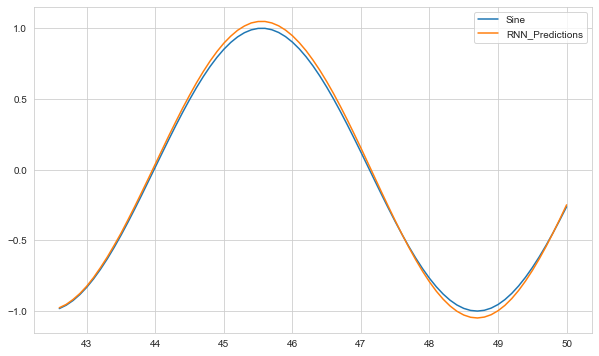

In [60]:
test.plot()

## Early Stopping and Validation Generator

In [61]:
from tensorflow.keras.callbacks import EarlyStopping

In [62]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)
# early stop için validation data gerekir

In [63]:
length = 64 # lenght range have to be shorter than range of test data
            # In this case lenght range = 64, test range = 75
            # test sayısı 64'ten az olsaydı validation generator herhangi bir data üretmeyecekti
        
batch_size =1

generator = TimeseriesGenerator(data = train_scaled, targets = train_scaled, length = length, batch_size = batch_size)

validation_generator = TimeseriesGenerator(data = test_scaled, targets = test_scaled, length = length, batch_size = batch_size)

In [64]:
len(validation_generator)

11

## LSTM

In [65]:
# define model
model = Sequential()

# LSTM layer
model.add(LSTM(units = 100, activation = "tanh", input_shape = (length, n_features)))

# Final Prediction
model.add(Dense(units = 1))

model.compile(optimizer = 'adam', loss = 'mse')

In [66]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [67]:
# params = 4 * ((size_of_input + 1) * size_of_output + size_of_output^2)
4 * ((1+1)*100+(100**2))

40800

In [68]:
model.fit_generator(generator = generator,
                    validation_data = validation_generator,
                    epochs = 20,
                    callbacks = [early_stop])

Epoch 1/20
362/362 [==============================] - 11s 24ms/step - loss: 0.0076 - val_loss: 4.7244e-06
Epoch 2/20
362/362 [==============================] - 8s 23ms/step - loss: 5.8287e-05 - val_loss: 5.0979e-06
Epoch 3/20
362/362 [==============================] - 8s 22ms/step - loss: 3.2757e-04 - val_loss: 1.5073e-05


<AxesSubplot:>

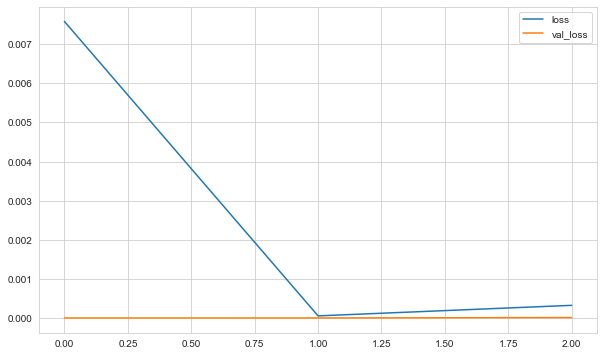

In [69]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [70]:
predictions_scaled = []

first_eval_batch = train_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead 
    current_pred = model.predict(current_batch)
    
    # store prediction
    predictions_scaled.append(current_pred[0]) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis = 1)

In [71]:
predictions = scaler.inverse_transform(predictions_scaled)
test['LSTM Predictions'] = predictions
test

,Sine,RNN_Predictions,LSTM Predictions
42.600,-0.982,-0.977,-0.967
42.700,-0.959,-0.953,-0.943
42.800,-0.925,-0.918,-0.909
42.900,-0.883,-0.876,-0.865
43.000,-0.832,-0.824,-0.812
...,...,...,...
49.600,-0.617,-0.632,-0.597
49.700,-0.536,-0.544,-0.528
49.800,-0.449,-0.450,-0.452
49.900,-0.357,-0.351,-0.372


<AxesSubplot:>

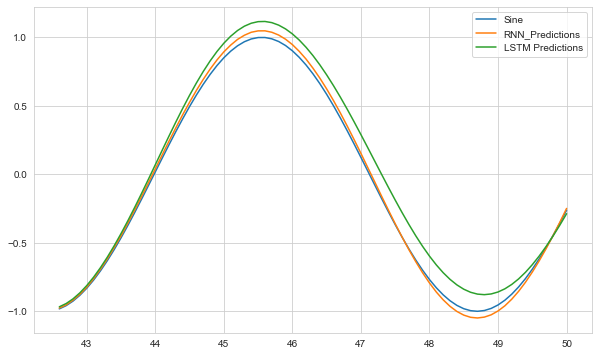

In [72]:
test.plot()

## Retrain and Forecasting

In [ ]:
# tüm datamızla modeli oluşturacağız

In [73]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

In [74]:
length = 64 
generator = TimeseriesGenerator(scaled_full_data, scaled_full_data, length = length, batch_size = 1)

In [75]:
model = Sequential()
model.add(LSTM(100, input_shape = (length, n_features)))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mse')
model.fit_generator(generator, epochs = 6)

Epoch 1/6
437/437 [==============================] - 12s 22ms/step - loss: 0.0117
Epoch 2/6
437/437 [==============================] - 10s 22ms/step - loss: 3.0575e-04
Epoch 3/6
437/437 [==============================] - 10s 22ms/step - loss: 3.4481e-04
Epoch 4/6
437/437 [==============================] - 10s 22ms/step - loss: 2.8945e-05
Epoch 5/6
437/437 [==============================] - 10s 22ms/step - loss: 6.8251e-05
Epoch 6/6
437/437 [==============================] - 10s 22ms/step - loss: 0.0026


In [76]:
forecast = []

first_eval_batch = scaled_full_data[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(length):
    
    # get prediction 1 time stamp ahead 
    current_pred = model.predict(current_batch)
    
    # store prediction
    forecast.append(current_pred[0]) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis = 1)

In [77]:
forecast = scaler.inverse_transform(forecast)

In [78]:
forecast

array([[-0.17160471],
       [-0.07203714],
       [ 0.02830969],
       [ 0.12860408],
       [ 0.22791737],
       [ 0.32525837],
       [ 0.41960258],
       [ 0.50991875],
       [ 0.59519193],
       [ 0.67444795],
       [ 0.74677605],
       [ 0.81135275],
       [ 0.86745959],
       [ 0.9144986 ],
       [ 0.95200321],
       [ 0.97964238],
       [ 0.99722   ],
       [ 1.00466933],
       [ 1.0020427 ],
       [ 0.98949983],
       [ 0.96729394],
       [ 0.93575774],
       [ 0.89528961],
       [ 0.84634433],
       [ 0.78942343],
       [ 0.72507024],
       [ 0.65386472],
       [ 0.5764252 ],
       [ 0.49340625],
       [ 0.40550501],
       [ 0.31346056],
       [ 0.21806015],
       [ 0.12014195],
       [ 0.0205956 ],
       [-0.07963804],
       [-0.17957176],
       [-0.27817928],
       [-0.3744083 ],
       [-0.46719685],
       [-0.55549389],
       [-0.63828223],
       [-0.71460295],
       [-0.78357912],
       [-0.8444354 ],
       [-0.89651507],
       [-0

In [79]:
df

,Sine
0.000,0.000
0.100,0.100
0.200,0.199
0.300,0.296
0.400,0.389
...,...
49.600,-0.617
49.700,-0.536
49.800,-0.449
49.900,-0.357


<AxesSubplot:>

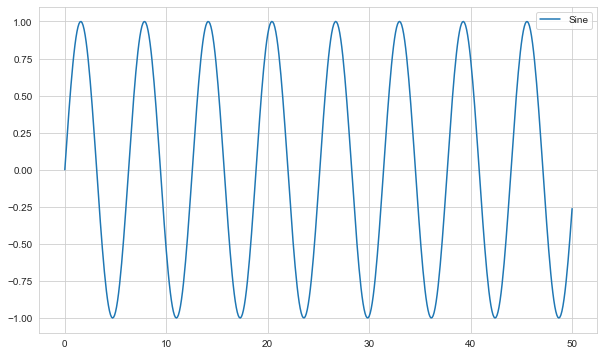

In [80]:
df.plot()

In [81]:
forecast_len = len(forecast)
forecast_len

64

In [82]:
step = 0.1

In [83]:
forecast_len * step

6.4

In [84]:
forecast_index = np.arange(50.1, 56.5, step = step)
# dataframe index'inin kaldığı yerden aynı aralıklarla devam etmesi için

In [85]:
len(forecast_index)

64

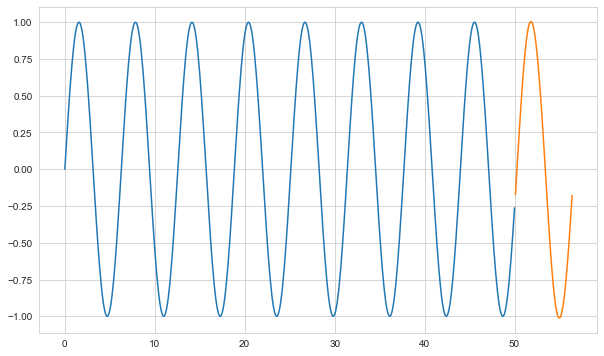

In [86]:
plt.plot(df.index, df['Sine'])
plt.plot(forecast_index, forecast);

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___